# Contents

- importing ords_prods df

- creating bar charts of day-business

- creating histogram bins for prices

- sampling 70 / 30 of the data

- creating lineplot of orders per day

- exporting df as pkl

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\ryani\Desktop\Data Analyst COURSE\Data Immersion\06-2025 E4 INSTACART Py"

In [3]:
ords_prods_merge = pd.read_pickle (os.path.join (path, '02 Data', 'Prepared Data', 'ords_prods_merge_E4.8.pkl'))

<Axes: xlabel='orders_day_of_week'>

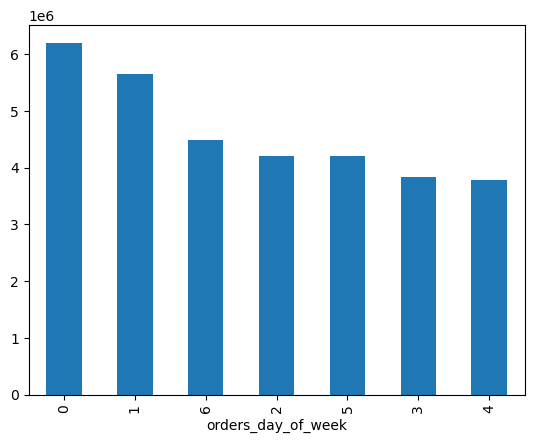

In [4]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

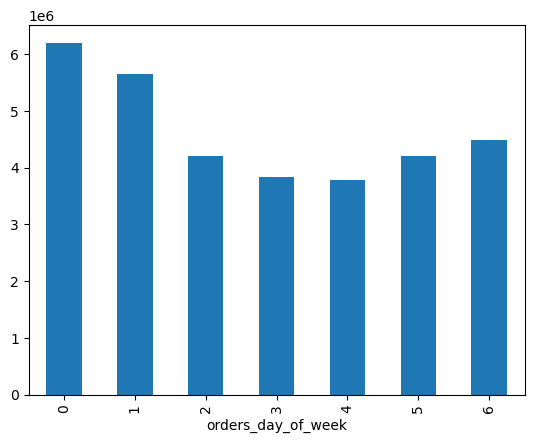

In [5]:
# Now values are in order of index number
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

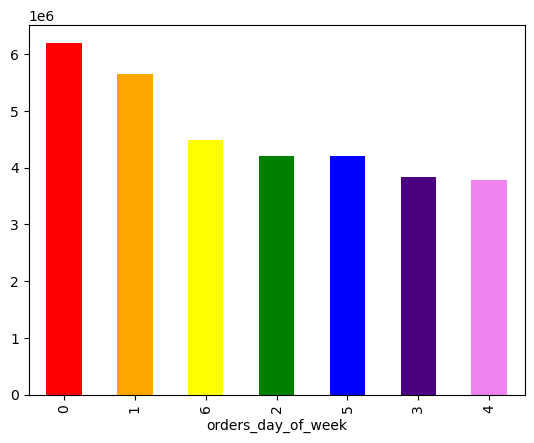

In [6]:
# add colours - https://matplotlib.org/stable/gallery/color/named_colors.html
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

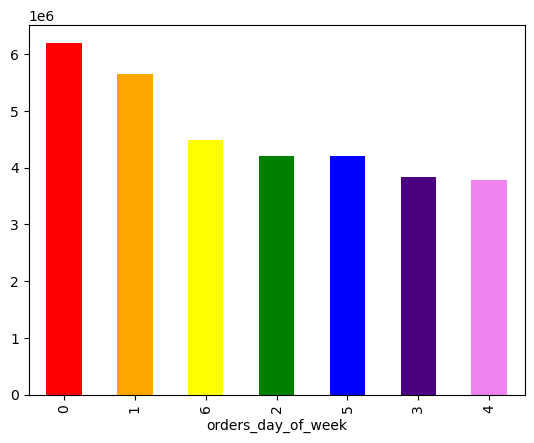

In [7]:
# above was not saved into memory - save as bar to save into memory
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

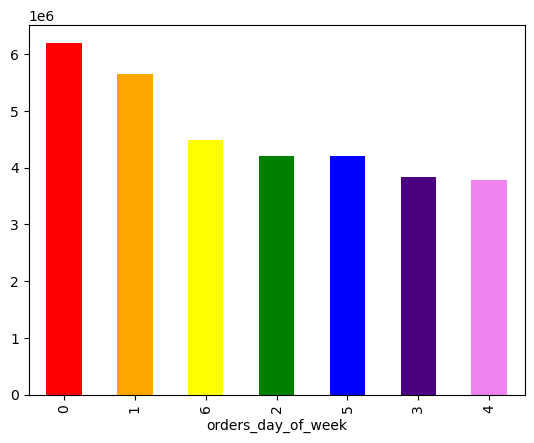

In [8]:
bar.figure

In [9]:
#Export the figure with savefig and save as png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

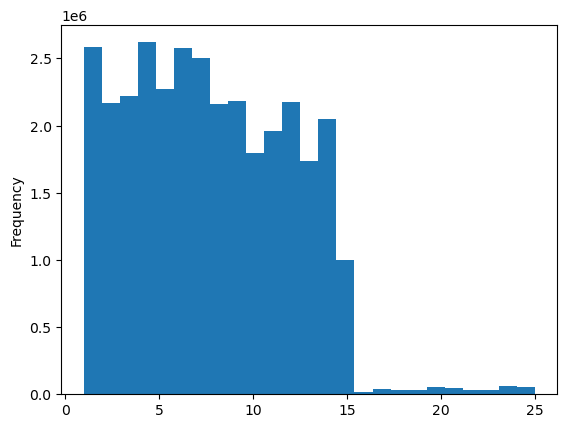

In [10]:
#Histogram with bins
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

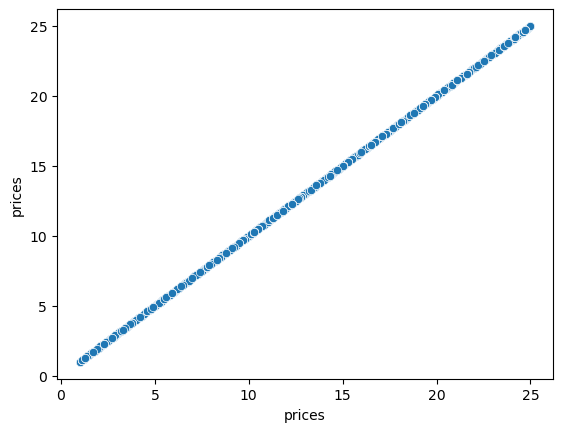

In [11]:
#Scatterplot of the data
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

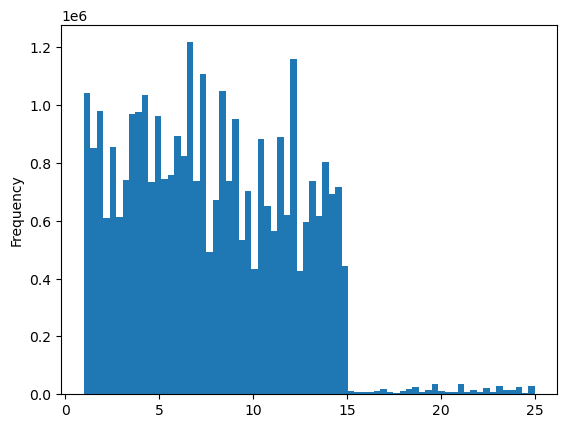

In [12]:
hist_2 = ords_prods_merge ['prices'].plot.hist(bins = 70)

In [13]:
#Export the figure with savefig and save as png
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

In order to create a subset that actually represents the entirety of your data, you’d need more than just the first 2,000,000 rows. And, more importantly, those rows would need to be randomized. You can’t simply choose from the first or last customers in the dataframe—it needs to be a random assortment taken from all throughout the dataframe. Only then can you be sure it accurately represents the dataframe as a whole.

The first step, then, is to create some random samples. A sample, as you learned back in Achievement 1, is a representative subsection of a population. In this case, you can split your dataframe into two samples with the same distribution, for instance an 80/20 or 70/30 split. If done correctly, both samples would have an equal proportion of data. In a 70/30 split, for example, the 30 percent sample would statistically resemble the 70 percent sample but contain less rows. You can then create charts from these samples the same as you would any other subset, the only difference being that you know these subsets accurately represent the entire dataframe as a whole.

This is a standard approach in machine learning. When training a model, you’d normally use 80 percent of a data set to train the algorithm and the remaining 20 percent to check the accuracy of the model.

Creating these samples requires a list of random floating numbers between 0 and 1 (with 1 representing 100 percent of the dataframe) that’s as long as the length of the dataframe. Each row in the dataframe is “assigned” one of these numbers, and then the numbers are compared to a value. In this case, the value is 0.7, since you want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio. This all sounds a little abstract. Let’s see how it works in practice:

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7
In the first line of the command, you set the “seed.” This “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers (in this case, seed “4”) rather than creating a new pattern of numbers every time you run the command. You don’t want that as your example needs to be reproducible by you and other analysts.

What’s in a Seed?
The value you put inside the seed doesn’t actually matter in the grand scheme of things. Whether you use 1, 52, 179, or 4, all you’re doing is ensuring that the random distribution you’re creating is reproducible. This is all a bit complex and falls outside the scope of this Exercise, but if you want to read more about seeds, take a look at this thread on the fast.ai forums: What does np.random.seed(2) do?

In [14]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

len = the length of the df which will be about 32 million rows. 

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

So, to recap each piece of the split code, you need to:

Set the seed for the random number generator.
Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.

Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).

Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [16]:
big = ords_prods_merge[dev]

In [17]:
small = ords_prods_merge[~dev]

big is 70% of the original and small is 30%, the squiggly means NOT DEV

In [18]:
#check the new dfs to make sure they make sense
len(ords_prods_merge)

32404859

In [19]:
len(big) + len(small)

32404859

In [20]:
df_2 = small[['orders_day_of_week','prices']]

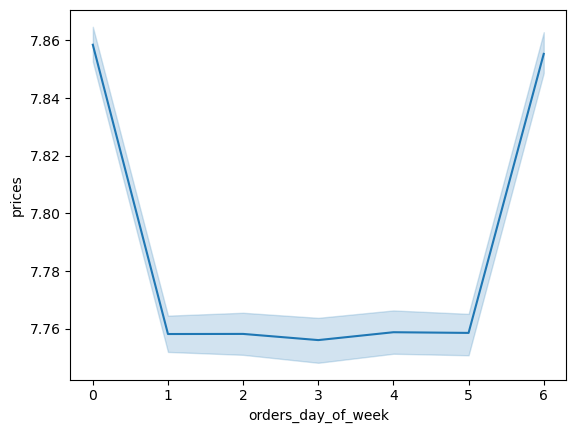

In [21]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [22]:
line.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations', 'line_prices_dow.png'))